 1. Setup & Load Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt


df = pd.read_csv("../data/data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])



2. Summary Statistics & Missing Value Report

In [4]:

df.describe()


missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
print(missing_percent[missing_percent > 5])


Comments    100.0
dtype: float64


3. Outlier Detection with Z-scores

In [5]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[columns_to_check].dropna()))
outliers = (z_scores > 3)
print(f"Outlier rows detected: {np.sum(outliers)}")


Outlier rows detected: 12550


4. Cleaning: Missing & Outliers

In [8]:

for col in columns_to_check:
    df[col] = df[col].fillna(df[col].median())
df_clean = df[(z_scores < 3).all(axis=1)].copy()

df_clean.to_csv("../data/togo-dapaong_qc.csv", index=False)


5. Time Series Analysis

c:\Users\try\OneDrive\Desktop\-solar-challenge-week1-1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


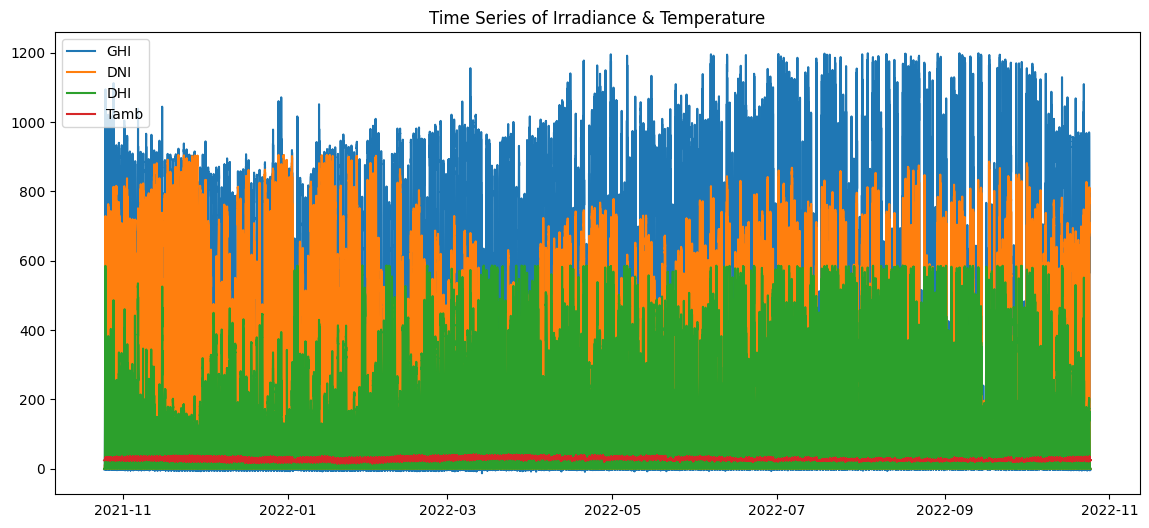

In [9]:
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_clean['Timestamp'], df_clean[col], label=col)
plt.legend()
plt.title("Time Series of Irradiance & Temperature")
plt.show()


6. Cleaning Impact on Sensors

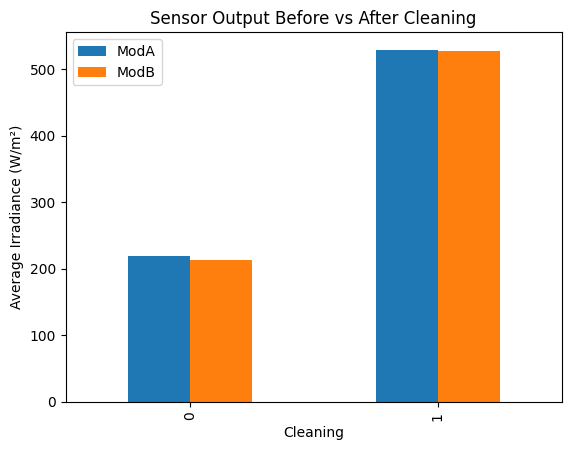

In [10]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Sensor Output Before vs After Cleaning")
plt.ylabel("Average Irradiance (W/m²)")
plt.show()


 7. Correlation Heatmap

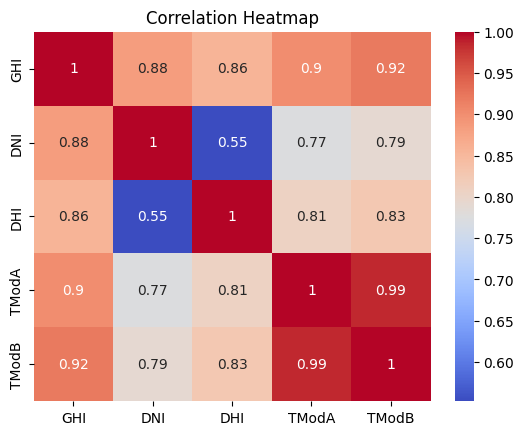

In [11]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


 8. Scatter Plots

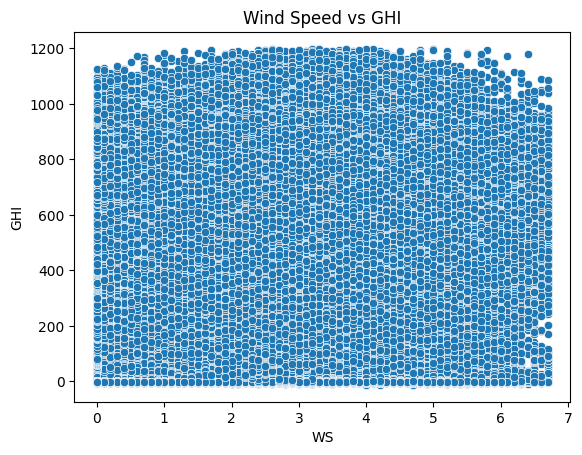

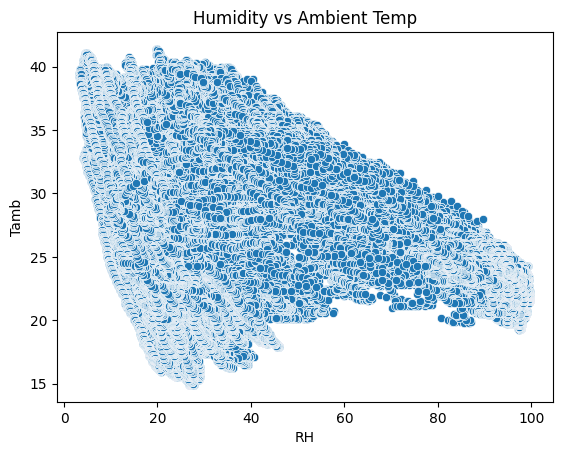

In [12]:
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Humidity vs Ambient Temp")
plt.show()


 9. Wind Rose / Radial Plot

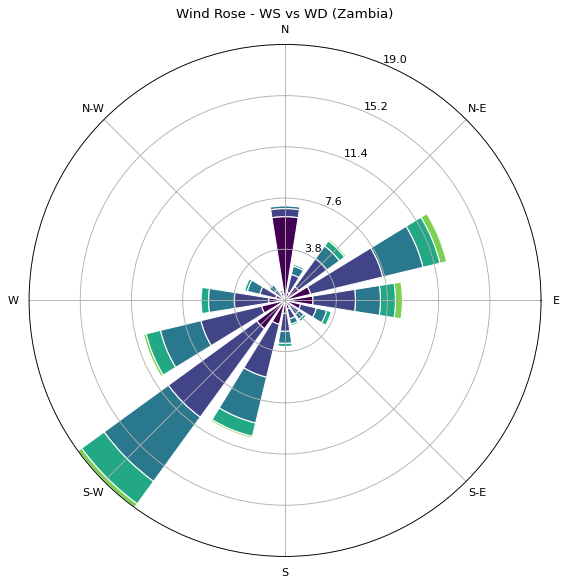

In [13]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose - WS vs WD (Zambia)")
plt.show()


10. Histograms

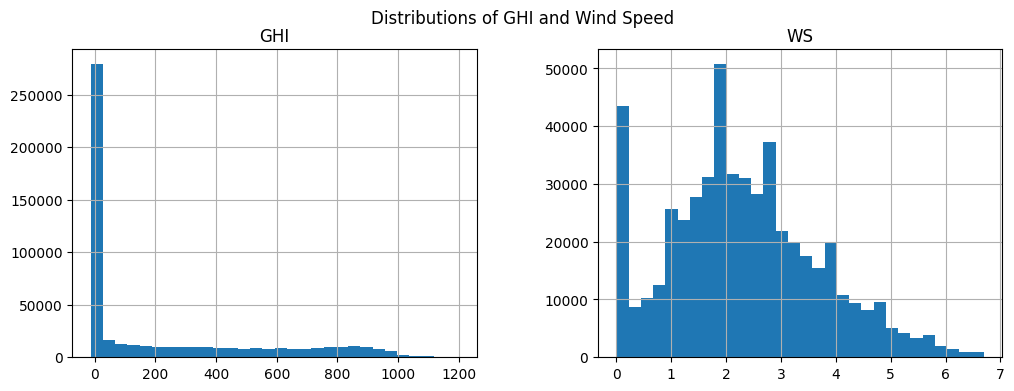

In [14]:
df_clean[['GHI', 'WS']].hist(bins=30, figsize=(12, 4))
plt.suptitle("Distributions of GHI and Wind Speed")
plt.show()


11. Bubble Chart

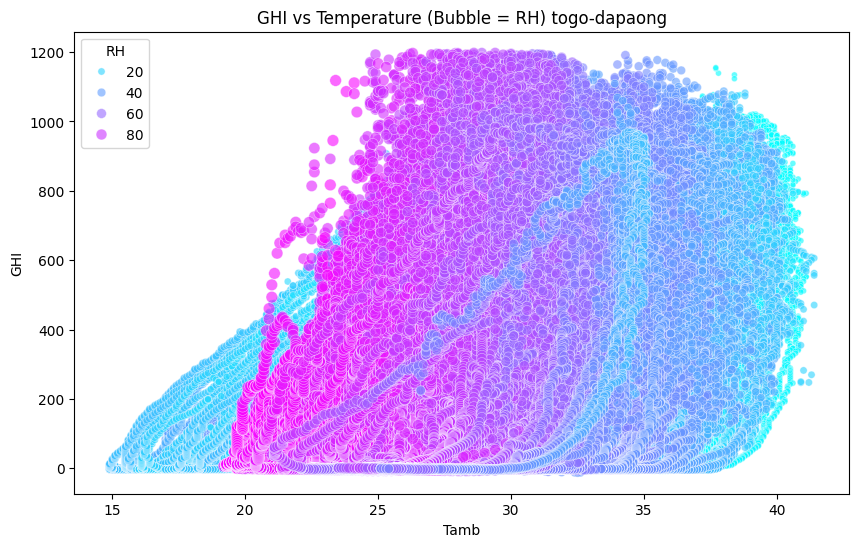

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Tamb', y='GHI', size='RH', hue='RH', alpha=0.6, palette='cool')
plt.title("GHI vs Temperature (Bubble = RH) togo-dapaong")
plt.show()
